In [1]:
from pathlib import Path

import pandas as pd

In [2]:
from data_loading import get_embeddings_dataset

C:\Users\yaara\anaconda3\envs\who-dis\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
all_data_dir_path = Path(r"C:\Users\yaara\OneDrive\Desktop\who_dis_data")
embeddings_dir = Path(all_data_dir_path, "embeddings")
labels_dir = Path(all_data_dir_path, "train_test_split")

X_train, X_test, y_train, y_test = get_embeddings_dataset(labels_dir, embeddings_dir)


In [4]:
y_train = y_train[X_train.keys()]
y_test = y_test[X_test.keys()]

In [5]:
num_vectors_dict = {id: len(vec_list) for id, vec_list in X_train.items()}
df = pd.DataFrame({"num_vectors": pd.Series(num_vectors_dict), "family":y_train})
df

,num_vectors,family
a3cd2553909f5a3b2e73749a0f7ceb512845a757fe42c1def5eb56985342b56b,924,7ev3n
ff905f9a2bf4e1e326915a8a3cdb20c3ffb9ed470ddc367141c961e9b37d6882,924,7ev3n
f5b326602562b01c3f7f94a89246f62992a26cac46a6a565f43f6ec1f35a83b9,924,7ev3n
50ef490b95ec97df99912bfc672c76501fa19a3455ddad05963236c3bff9d01c,924,7ev3n
2460ad3fb1bdf217cea9cb08d93af6be354dda4c3e00c7e9dc38e34bd24197ce,924,7ev3n
...,...,...
ce993d18472a04db684d505f5cd1a51f52707da8e13e09c2e01cdf604128df1b,16,SugarRansomware
e7bf91dbd43723ade2e1819f2e6401393a799036f6ca5ce768eb098389344ddc,783,SugarRansomware
5816a77bf4f8485bfdab1803d948885f76e0c926fed9da5ac02d94e62af8b145,16,SugarRansomware
0abc7d41f326b4a5915d2656a142daf809391f2275f148b31f96b4e3be641f89,544,SugarRansomware


In [17]:
df.groupby("family").agg(["count", "mean", "std", "max", "min])

num_vectors                                   
                      count        mean         std   max  min
family                                                        
7ev3n                   103  923.970874    0.295599   924  921
Conti                    20  490.250000  188.914594   644   88
Emotet                   40  739.675000  142.239485  1157  687
Orcus                   108   89.324074  316.434276  1757    1
SugarRansomware          66  180.469697  251.734061   783    1

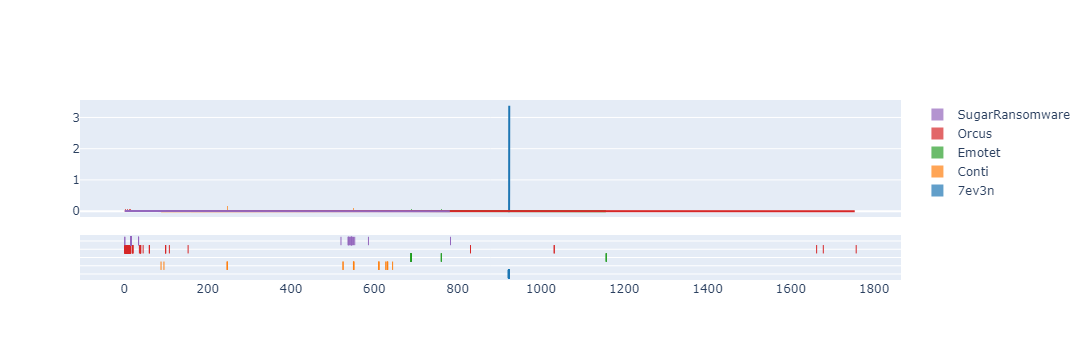

In [31]:
import plotly.express as px
import plotly.figure_factory as ff

grouped = df.groupby(df['family'])
families = df['family'].unique()

fig = ff.create_distplot([grouped.get_group(family)["num_vectors"] for family in families], families,  bin_size=1)
fig.show()



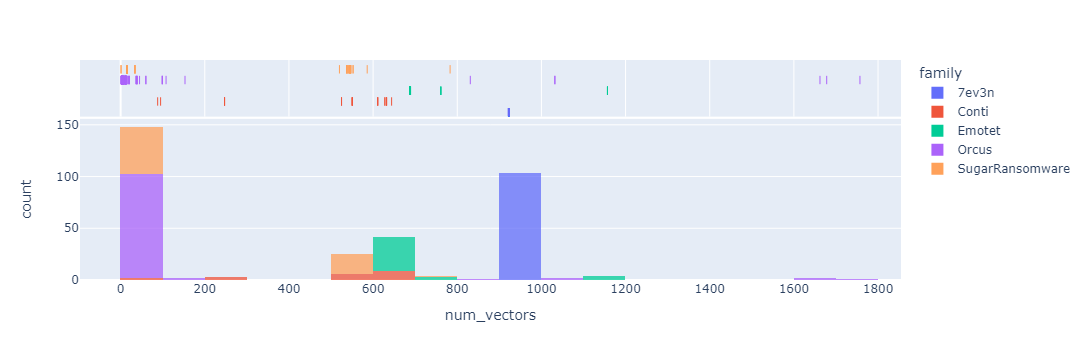

In [33]:
fig = px.histogram(df, x="num_vectors", color="family",  marginal="rug", opacity=0.75)
fig.show()